In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [0]:
concrete_df =  pd.read_csv("concrete.csv")
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [0]:
concrete_df.shape

(1030, 9)

Here we have 1030 Records with 9 columns out of which strength is our target column and rest are feature column

In [0]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Every column is given as non-null with datatype as float or Interger . It means there is no any null value in data

In [0]:
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In every column there is a huge difference between the mean and median value so here I can say that data is not normally distributed in columns.Here we can see age is given from day 1 to 365 with std value 63.16.Also there are some columns which shows minimum value as zero like slag ,ash,superplastic . Lets see how many records are there with 0 value

In [0]:
slag_with_zero_value = len(concrete_df[concrete_df["slag"]== 0])
ash_with_zero_value = len(concrete_df[concrete_df["ash"]== 0])
superplastic_with_zero_value = len(concrete_df[concrete_df["superplastic"]== 0])
print("There are {} Number of records with 0 value in slag column".format(slag_with_zero_value))
print("There are {} Number of records with 0 value in ash column".format(ash_with_zero_value))
print("There are {} Number of records with 0 value in superplastic column".format(superplastic_with_zero_value))

There are 471 Number of records with 0 value in slag column
There are 566 Number of records with 0 value in ash column
There are 379 Number of records with 0 value in superplastic column


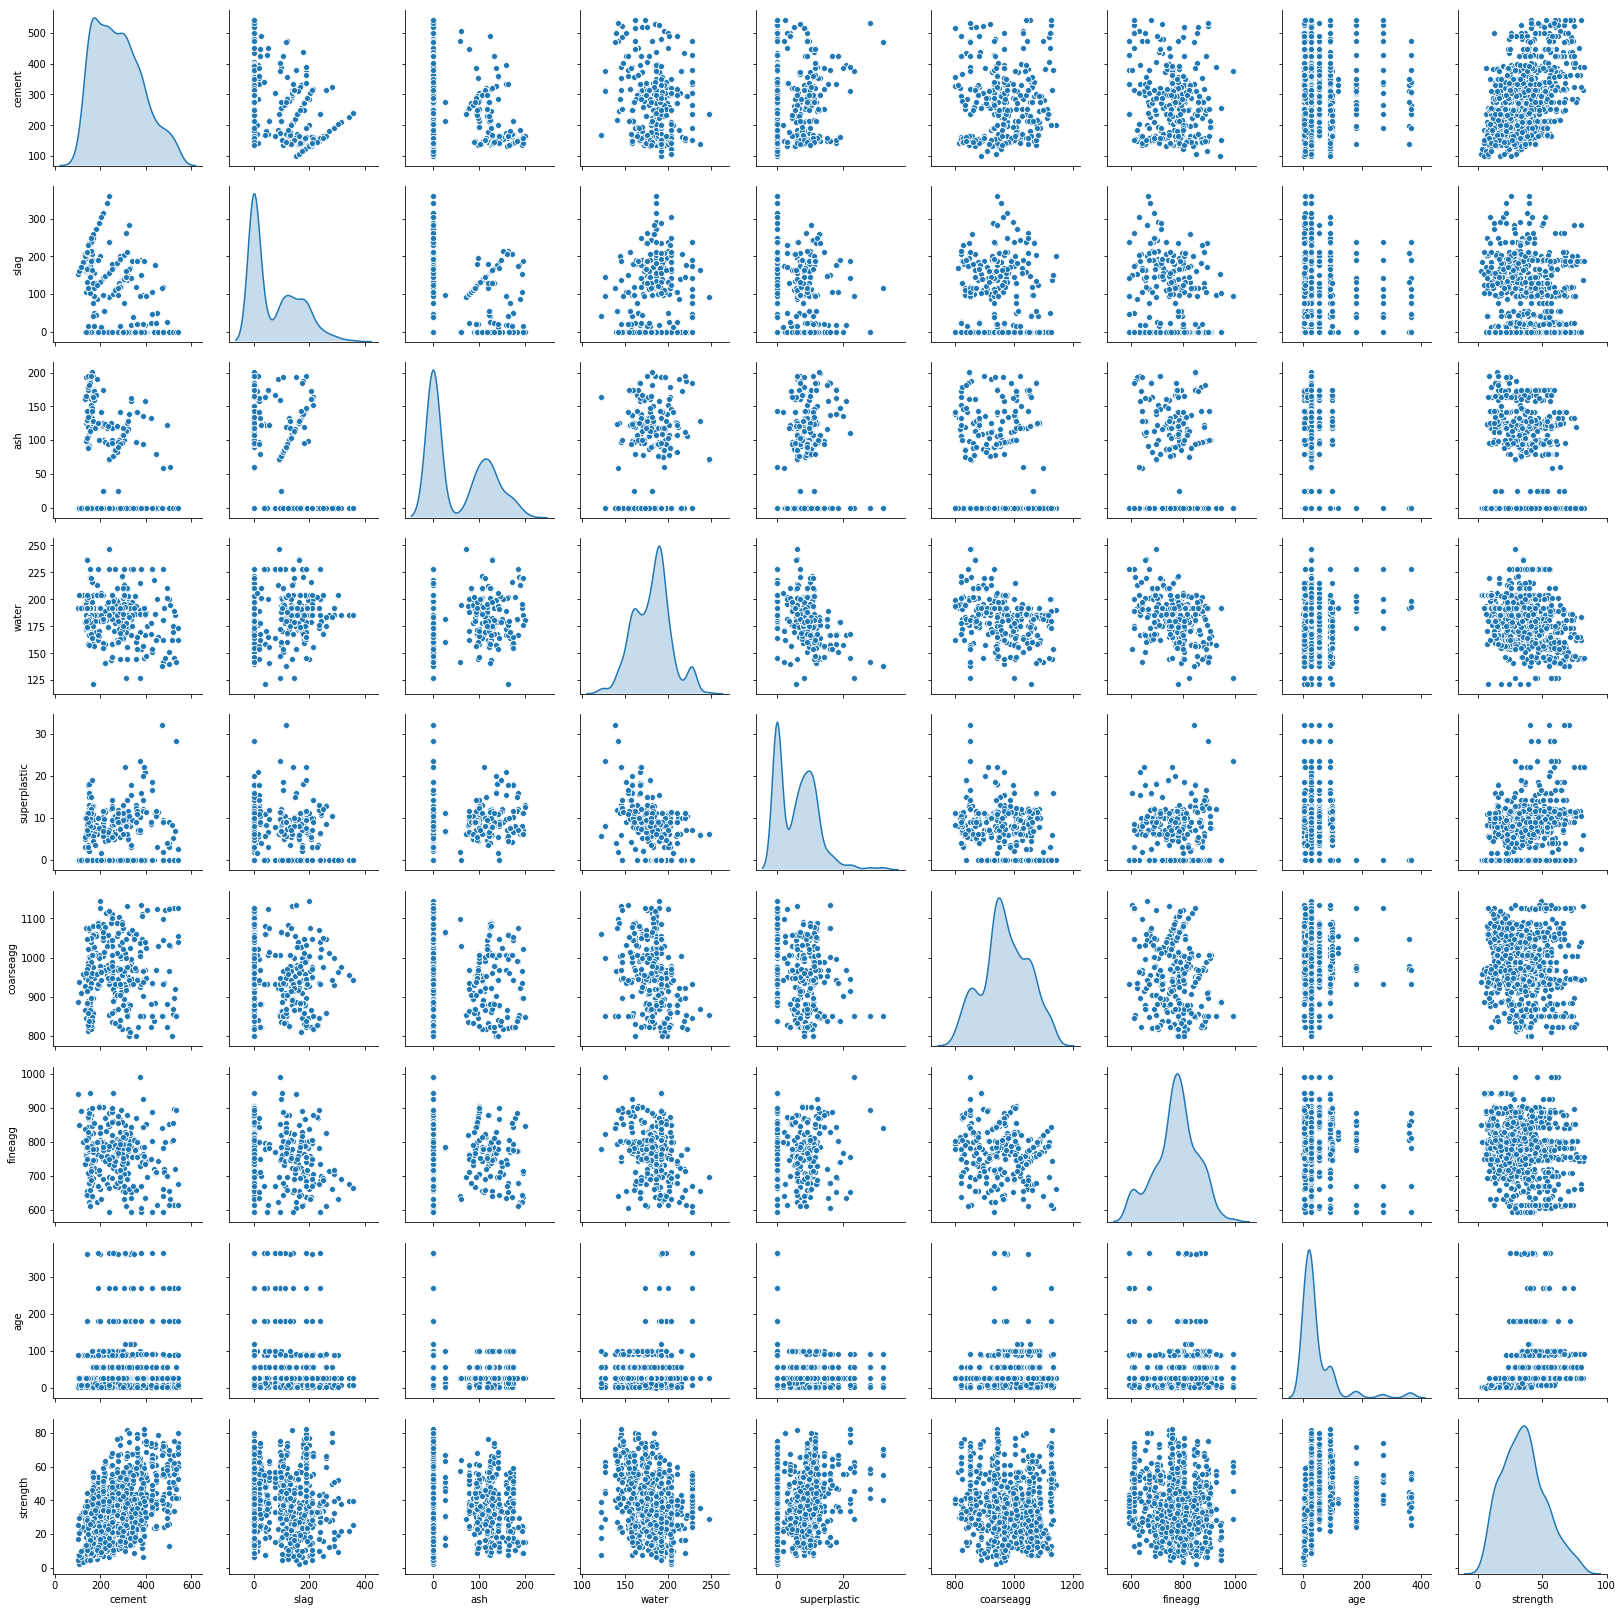

In [0]:
sns.pairplot(data = concrete_df,diag_kind="kde")

If we go with the diagonals then we can say data is not normally distributed among columns.By going with off diagonals there is a linear relationship between cement and strength(Target Variable). As the value of cement increase , strength also increase.Most of the variables are showing cloudy or no relation among themselves and this is what actaully require to create a good model.But apart from relationship between cement and strength and between age and Strenght , there is cloudy relation between all the independent and dependent variables.

In [0]:
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


There is very low correlation value among independent variables except correlation value of -0.657 between water and superplastic.Below is the graphical presentation of the correlation matrix.Also there is very low correlation value between independent and dependent variable . Here I am not going to use PCA in feature selection because there are very low of correlation among independent variable

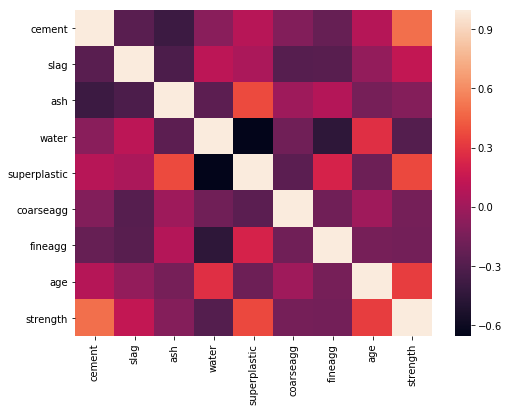

In [0]:
plt.figure(figsize=(8,6))
sns.heatmap(concrete_df.corr())

## Univariate Analysis

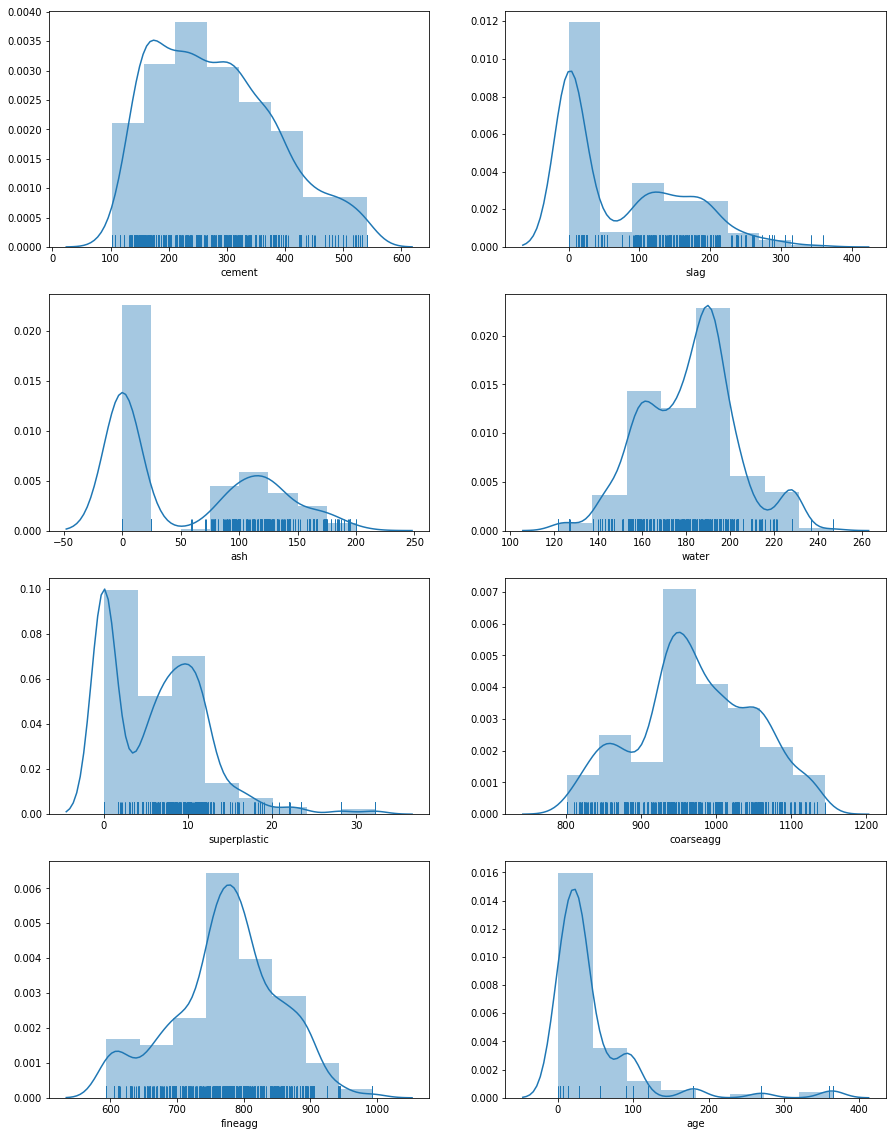

In [0]:
feature_columns = concrete_df.drop("strength",axis=1)
columns = feature_columns.columns
k=0
fig, ax = plt.subplots(4,2,figsize = (15,20))
for i in np.arange(4):
    for j in np.arange(2):
        sns.distplot(feature_columns[columns[k]],bins=8,rug=True,ax=ax[i][j])
        k=k+1

From Cement graph we can observe maximum values lies between 200 and 300.From Slag graph Maximum values are given as 0 . As I stated above there are 471 records in slag column which contain 0 vaue.In the same way in ash column maximum values that is 566 values are given as 0. In water graph maximum value lies between 190 and 200. In superplastic there are 379 records with 0 value. Apart from 0 in superplastic maximum values are near about 10 .In Coarseagg maximum values lies between 950 and 1000.In Fineagg column maximum values lies between 750 and 800. Also we can see data is not normally distributed in any of the column.

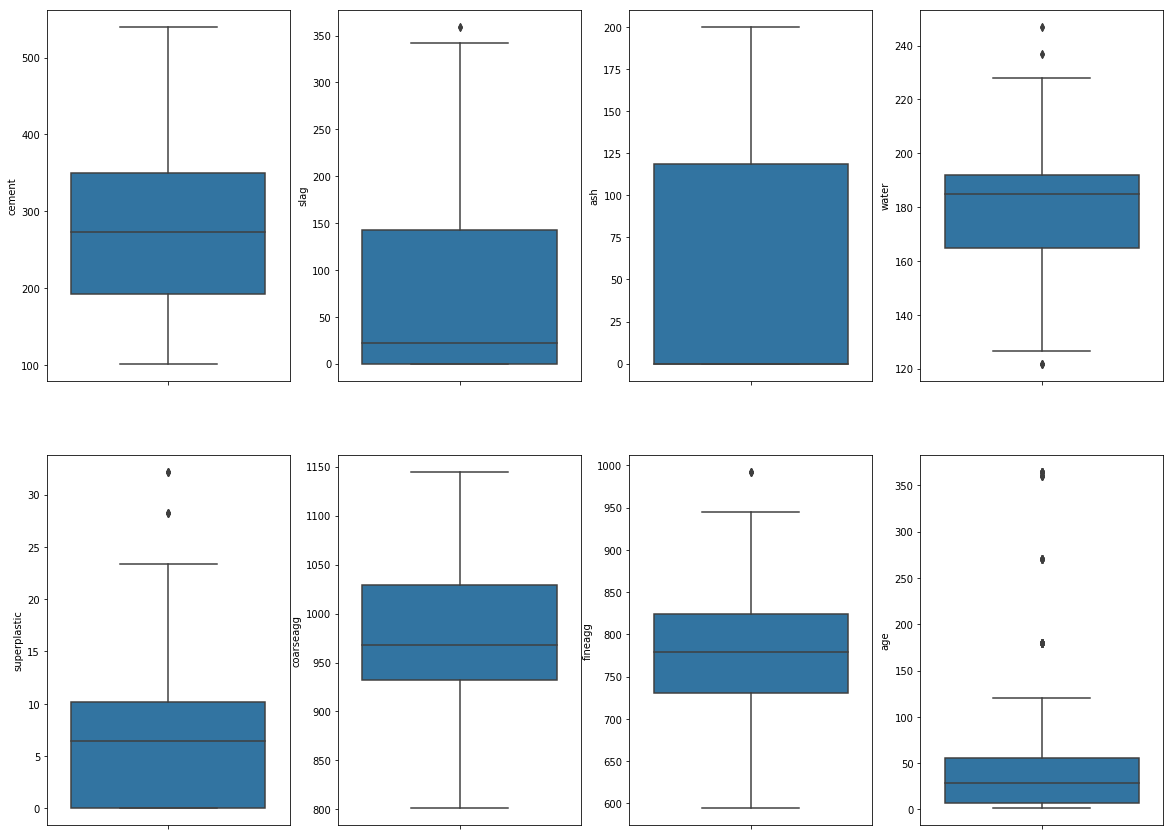

In [0]:
feature_columns = concrete_df.drop("strength",axis=1)
columns = feature_columns.columns
k=0
fig, ax = plt.subplots(2,4,figsize = (20,15))
for i in np.arange(2):
    for j in np.arange(4):
        sns.boxplot(y=feature_columns[columns[k]],ax=ax[i][j])
        k=k+1

There are many outliers in the data which can impact the outcome of model. So lets First Check how many outliers are there in our data.

In [0]:
# Function to replace outliers
def get_outliers(data,column):
    q3 = np.percentile(data,75)
    q1 = np.percentile(data,25)
    iqr = q3-q1
    upper_boundry = (1.5*iqr) + q3
    upper_outliers = data[data>upper_boundry]
    number_of_outliers = len(upper_outliers);
    median_value = data.median()
    print("Total No. of upper Outliers in {} column is {}".format(column,number_of_outliers))
    return median_value, upper_boundry

In [0]:
# Counting and Replacing outleirs with their respective column median value
for i in np.arange(len(columns)-1):
    median_value , upper_boundry = get_outliers(feature_columns[feature_columns.columns[i]],feature_columns.columns[i])
    feature_columns[feature_columns.columns[i]] =  feature_columns.apply(lambda x: median_value  if x[feature_columns.columns[i]] > upper_boundry else x[feature_columns.columns[i]],axis=1)
median_value = feature_columns["water"].median()   
feature_columns["water"] =  feature_columns.apply(lambda x: median_value if x["water"]<=121.8 else x["water"],axis=1)    


Total No. of upper Outliers in cement column is 0
Total No. of upper Outliers in slag column is 2
Total No. of upper Outliers in ash column is 0
Total No. of upper Outliers in water column is 4
Total No. of upper Outliers in superplastic column is 10
Total No. of upper Outliers in coarseagg column is 0
Total No. of upper Outliers in fineagg column is 5


<b> Except the Age column I have replaced all the outliers with their respective column's median value. Lets draw boxplot again to check the number of outliers</b> 

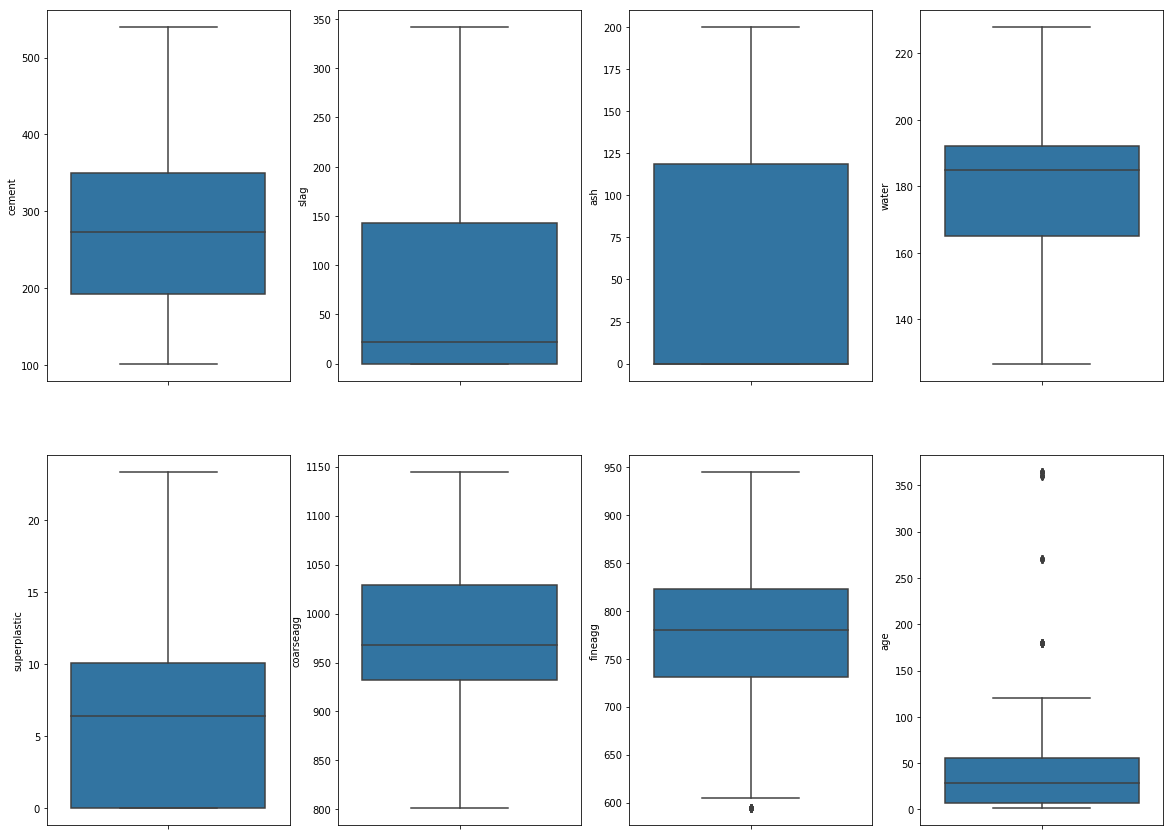

In [0]:
columns = feature_columns.columns
k=0
fig, ax = plt.subplots(2,4,figsize = (20,15))
for i in np.arange(2):
    for j in np.arange(4):
        sns.boxplot(y=feature_columns[columns[k]],ax=ax[i][j])
        k=k+1

Except the Age column I have removed all the outliers and after removing previous outliers some new outliers have been craeted in fineagg column

In [0]:
# coverting data into z score for scaling the data
from scipy.stats import zscore
feature_columns_z = feature_columns.apply(zscore)
feature_columns_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.279733
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.501465
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.279733
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.279733
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.279733


In [0]:
# Making dependent and independent column separately
X = feature_columns_z
y = concrete_df["strength"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.30 , random_state = 101)
print("Total Number of records in X train :{}".format(X_train.shape))
print("Total Number of records in X test :{}".format(X_test.shape))
print("Total Number of records in y train :{}".format(y_train.shape))
print("Total Number of records in y test :{}".format(y_test.shape))   

Total Number of records in X train :(721, 8)
Total Number of records in X test :(309, 8)
Total Number of records in y train :(721,)
Total Number of records in y test :(309,)


Here X represent all the independent columns and y represent the dependent column. further I have splitted the data into training and test set in 70:30 ratio. So in training set we have 721 records and in test set we have 309 records

In [0]:
# Using Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
linear_coeff = linear_model.coef_
linear_intercept = linear_model.intercept_
for i in np.arange(len(X.columns)):
    print("Coefficient of {} is : {}  ".format(X.columns[i],linear_coeff[i]))
print(" Y-Intercept : ",linear_intercept )    

Coefficient of cement is : 12.350067645148535  
Coefficient of slag is : 8.8277245203151  
Coefficient of ash is : 4.786936797863749  
Coefficient of water is : -2.7728855575311067  
Coefficient of superplastic is : 2.2129691463334495  
Coefficient of coarseagg is : 1.7393393863497  
Coefficient of fineagg is : 1.913685967996269  
Coefficient of age is : 7.168695534273603  
 Y-Intercept :  35.672739150874456


Here Predicted value of Y will be (12.35*cement) + (8.827*slag) + (4.786*ash) + (-2.7728*water) + (2.2129*superplastic) +(1.7393 * coarseagg) + (1.9136*fineagg) + (7.16869 *age) + 35.672

In [0]:
# Printing the R^2 value for the model
y_prediction =  linear_model.predict(X_test)
linear_model.score(X_test,y_test)

0.6596071650541248

<b>Here the value of R squared in Linear Regression model is showing 65.96% accuracy . The reason for this low accuracy is that we have more dimentions as compared to the number of records and most of the dimentions do not show strong relation with Target column . So here i am going to use some feature selection techniques to reduce the number of unnecessary columns </b>

## Feature Selection

### 1. SelectKBest

In [0]:
from sklearn.feature_selection import SelectKBest , f_regression

In [0]:
# Here I am selecting 5 most imporatnt indpendenty variable out of total 8 independent variables
selectKBest =  SelectKBest(score_func=f_regression,k=5)
selectKBest.fit(X,y)
selectKBest_df = pd.DataFrame(data=selectKBest.scores_,index=X.columns,columns=["scores"])
selectKBest_df.sort_values(by="scores",ascending = False).reset_index(drop = False)

,index,scores
0,cement,338.724341
1,superplastic,140.043533
2,age,124.669830
3,water,107.517795
4,fineagg,35.292399
5,coarseagg,28.747144
6,slag,19.898378
7,ash,11.627298


Here I am going to take only first Six high rated scores column for Linear Regression purpose

#### Linear Regression taking only Six independent columns

In [0]:
X = feature_columns_z[["cement","superplastic","age","water","fineagg","coarseagg"]]
y = concrete_df["strength"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.30 , random_state = 101)

print("Total Number of records in X train :{}".format(X_train.shape))
print("Total Number of records in X test :{}".format(X_test.shape))
print("Total Number of records in y train :{}".format(y_train.shape))
print("Total Number of records in y test :{}".format(y_test.shape)) 

Total Number of records in X train :(721, 6)
Total Number of records in X test :(309, 6)
Total Number of records in y train :(721,)
Total Number of records in y test :(309,)


In [0]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

linear_coeff = linear_model.coef_
linear_intercept = linear_model.intercept_
for i in np.arange(len(X.columns)):
    print("Coefficient of {} is : {}  ".format(X.columns[i],linear_coeff[i]))
print(" Y-Intercept : ",linear_intercept )    

Coefficient of cement is : 5.47361668744315  
Coefficient of superplastic is : 1.392795936431094  
Coefficient of age is : 6.661329485480676  
Coefficient of water is : -7.784950920870502  
Coefficient of fineagg is : -4.821279533622036  
Coefficient of coarseagg is : -3.5613920436246453  
 Y-Intercept :  35.62373632733694


In [0]:
# Printing the R^2 value for the model
y_prediction =  linear_model.predict(X_test)
linear_model.score(X_test,y_test)

0.6475458115286026

<b>Here after taking only 6 columns for Linear Regression we are getting 64.75% which is only 1.21% less than the previous Linear Regression Model but still we manage to reduce two colums slag and ash which contains 45.7% and 54.94% records containing zerors.</b>

### 2. Recursive Feature Elimination

In [0]:
from sklearn.feature_selection import RFE

X = feature_columns_z
y = concrete_df["strength"]

linear_model =  LinearRegression()
rfe =  RFE(linear_model,n_features_to_select=5)
rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)
print(X.columns)

[ True  True  True  True False False False  True]
[1 1 1 1 2 4 3 1]
Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')


In [0]:
X = feature_columns_z[["cement","slag","water","age","ash"]]
y = concrete_df["strength"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.30 , random_state = 101)

print("Total Number of records in X train :{}".format(X_train.shape))
print("Total Number of records in X test :{}".format(X_test.shape))
print("Total Number of records in y train :{}".format(y_train.shape))
print("Total Number of records in y test :{}".format(y_test.shape)) 

Total Number of records in X train :(721, 5)
Total Number of records in X test :(309, 5)
Total Number of records in y train :(721,)
Total Number of records in y test :(309,)


In [0]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

linear_coeff = linear_model.coef_
linear_intercept = linear_model.intercept_
for i in np.arange(len(X.columns)):
    print("Coefficient of {} is : {}  ".format(X.columns[i],linear_coeff[i]))
print(" Y-Intercept : ",linear_intercept )  

Coefficient of cement is : 11.035190395971087  
Coefficient of slag is : 7.71923246051824  
Coefficient of water is : -5.423219736759738  
Coefficient of age is : 7.152595848064935  
Coefficient of ash is : 4.368545759694119  
 Y-Intercept :  35.68371331283847


In [0]:
# Printing the R^2 value for the model
y_prediction =  linear_model.predict(X_test)
linear_model.score(X_test,y_test)

0.6656724772238356

<b>Here our score by using Recursive Feature Elimination method is 66.56% which shows very little improvement in overall score and our model is still not a good indicator of a good model.</b>

By Looking at the Pairplot diagonal wise we can say that there are three or more peaks in the data. So there may be three or more different types of Clusters in the data.Lets See if we can increase our model performence by dividing the data cluster wise.

### K Means Clustering

In [0]:
# Here I am taking cluster range from 2 to 14
cluster_range = np.arange(2,15)
cluster_errors = []
for i in cluster_range:
    k_means =  KMeans(n_clusters=i,n_init=5)
    k_means.fit(feature_columns_z)
    k_means.predict(feature_columns_z)
    cluster_errors.append(k_means.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,6564.286599
1,3,5616.250934
2,4,4810.236671
3,5,4106.014268
4,6,3641.057424
5,7,3382.316368
6,8,3167.813478
7,9,3008.384416
8,10,2911.888487
9,11,2719.436850


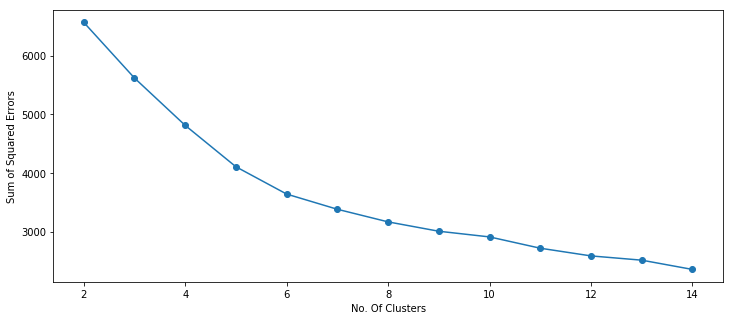

In [0]:
# Elbow Plot For Cluster Errors
plt.figure(figsize=(12,5))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel("No. Of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

From the above plot I can say that there must be atleast 6 or 7 Clsuters in the data which is very high number of Clsuters according to the number of records that we have . We have only 1030 records and dividing 1030 records into 6 or 7 clusters will not produce a good result. So here I am not going to use K means Clustering for feature selection and model tuning.

### Decision Tree Regression

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
X = feature_columns_z
y = concrete_df["strength"]
from sklearn.metrics import mean_squared_error
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.30 , random_state = 101)

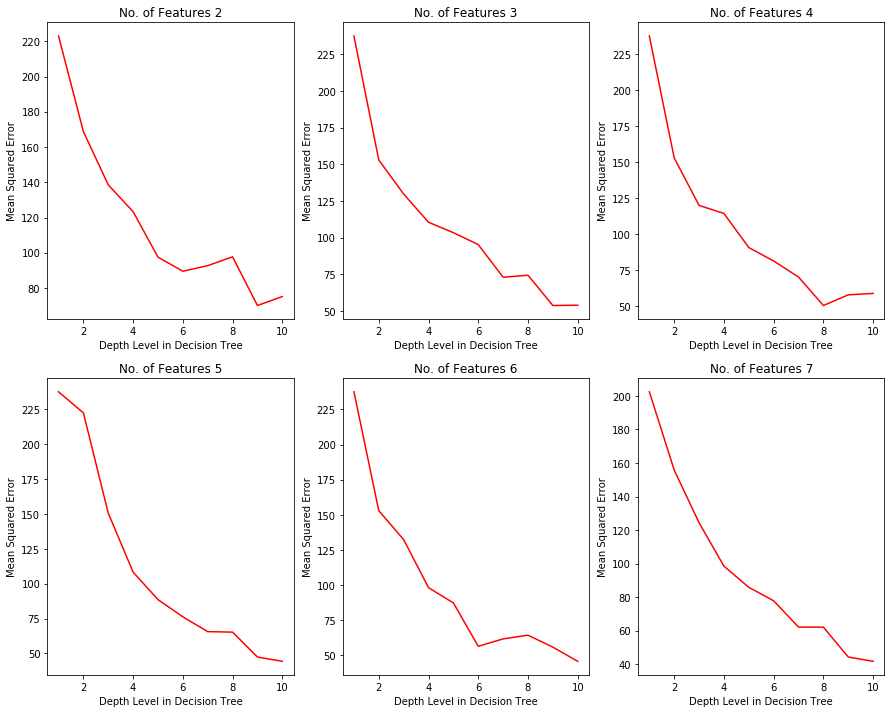

In [0]:
k = 2
def calculate_mean_squared_errors(max_features):
    mse = []
    for j in np.arange(1,11):
        dt_model =  DecisionTreeRegressor(max_depth=j,max_features=max_features,random_state=101)
        dt_model.fit(X_train,y_train)
        y_prediction =  dt_model.predict(X_test)
        mse.append(mean_squared_error(y_test,y_prediction))
    return mse    

fig , ax = plt.subplots(nrows=2,ncols=3,figsize = (15,12))
for i in np.arange(2):
    for j in np.arange(3):
        t =sns.lineplot(x = np.arange(1,11),y=calculate_mean_squared_errors(k),ax = ax[i][j],color ="red")
        t.set(xlabel="Depth Level in Decision Tree",ylabel = "Mean Squared Error" , title= "No. of Features {}".format(k))
        k=k+1

After Analysing all the above plot I found the 3rd plot is best to use with No.of Features is equal to 4 and max_depth is equal to 8 with Mean Squared Error approximate 50

In [0]:
# Here I am Using with max_depth = 8 and Max_features = 4

dt_model =  DecisionTreeRegressor(criterion="mse",random_state=101,max_depth=8,max_features=4)
dt_model.fit(X_train,y_train)
print("Scores With Training Set : " , dt_model.score(X_train,y_train))
print("Scores With Test Set : " , dt_model.score(X_test,y_test))
y_prediction = dt_model.predict(X_test)
print("Mean Squared Errors :",  mean_squared_error(y_test,y_prediction))

Scores With Training Set :  0.9496142385292091
Scores With Test Set :  0.8236482938602215
Mean Squared Errors : 50.50084890638672


Here decision tree model is getting 94.96 % accuracy in training data and 82.36% Accuracy in Test data.Lets try to improve the score using Random Forest Method in Ensemble Technique.

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

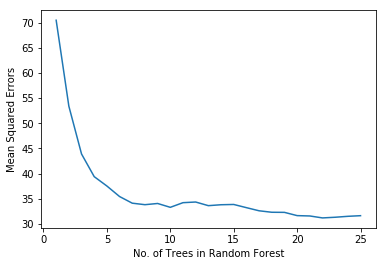

In [0]:
mse = []
for i in np.arange(1,26):
    rf_model =  RandomForestRegressor(criterion="mse",n_estimators=i,random_state=101)
    rf_model.fit(X_train,y_train)
    mse.append(mean_squared_error(y_test,rf_model.predict(X_test)))
t = sns.lineplot(x = np.arange(1,26),y=mse)
t.set(xlabel = "No. of Trees in Random Forest",ylabel = "Mean Squared Errors")
plt.show()

At 22 trees in Random forest we get the least value of Mean Squared Errors

In [0]:
rf_model =  RandomForestRegressor(criterion="mse",n_estimators=22,random_state=101)
rf_model.fit(X_train,y_train)
y_prediction =  rf_model.predict(X_test)
print("Score with Training Dataset :" , rf_model.score(X_train,y_train))
print("Score With Test Data Set :" , rf_model.score(X_test,y_test))
print("Mean Squared Errors : " ,mean_squared_error(y_test,y_prediction))

Score with Training Dataset : 0.9798466528686561
Score With Test Data Set : 0.8910168519435953
Mean Squared Errors :  31.2088928075158


<b>Here I am getting 97.98% r square value in training data and 89.10 % r square value in test data</b>

## Ensemble Technique - Bagging

In [0]:
from sklearn.ensemble import BaggingRegressor

In [0]:
bagging_regressor = BaggingRegressor(base_estimator=dt_model,n_estimators=50,random_state=101,max_samples=0.50,oob_score=False)
bagging_regressor.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=8,
                                                      max_features=4,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=101,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0.5, 

In [0]:
y_prediction =  bagging_regressor.predict(X_test)
print("Score with Training Dataset :" , bagging_regressor.score(X_train,y_train))
print("Score With Test Data Set :" , bagging_regressor.score(X_test,y_test))
print("Mean Squared Errors : " ,mean_squared_error(y_test,y_prediction))

Score with Training Dataset : 0.9375778976768594
Score With Test Data Set : 0.8559320541296422
Mean Squared Errors :  41.255929562063585


<b>Here I am getting 93.75% r square value in training data and 85.59 % r square value in test data</b>

## Ensemble Technique- ADABoosting


In [0]:
from sklearn.ensemble import AdaBoostRegressor

In [0]:
ada_boosting_regressor =  AdaBoostRegressor(base_estimator=dt_model,n_estimators=50,random_state=101)
ada_boosting_regressor.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=8,
                                                       max_features=4,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=101,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state

In [0]:
y_prediction =  ada_boosting_regressor.predict(X_test)
print("Score with Training Dataset :" , ada_boosting_regressor.score(X_train,y_train))
print("Score With Test Data Set :" , ada_boosting_regressor.score(X_test,y_test))
print("Mean Squared Errors : " ,mean_squared_error(y_test,y_prediction))

Score with Training Dataset : 0.9547958681494828
Score With Test Data Set : 0.8445968013892697
Mean Squared Errors :  44.501942308339686


<b>Here I am getting 95.47% r square value in training data and 84.45 % r square value in test data</b>

<b>Conclusion - > Most of the independent column have cloudy relation with dependent column and also data is not normally distributed among columns . I have not Used PCA for feature selection because there is no strong correlation among Independent columns.Here Decision tree is providing 82.36% r square value in test set and by using Random Forest we are getting  89.10% r squared value with minimum mean squared error which is the best among all above models</b>